In [4]:
%store -r __toolboxforsalesdata

In [5]:
__toolboxforsalesdata

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
monitoring_data = pd.read_csv('monitoring_data.csv')

In [7]:
monitoring_data.head()

,Unnamed: 0,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score,Features
0,0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.152129,2.163706,1.17125,Lag1
1,1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.152377,2.160372,1.16766,Lag1
2,2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.782377,2.151485,1.14767,Lag1
3,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092,ensemble_lin_xgb_0092_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.935000,2.047780,1.09124,Lag1_Lag2_Seasonal
4,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092_less_0025,ensemble_lin_xgb_0092_lag1_lag2_season_less_0025,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.936000,2.050922,1.09067,Lag1_Lag2_Seasonal


In [8]:
??plt.plot

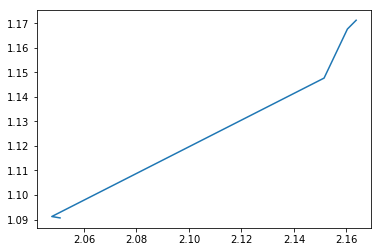

In [9]:
fig , ax = plt.subplots()
ax.plot(monitoring_data['Validation_Score_after_clip'], monitoring_data['Public_LB_Score'])
plt.show()

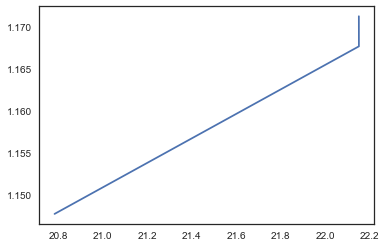

In [254]:
fig , ax = plt.subplots()
ax.plot(monitoring_data['Validation_Score_before_clip'], monitoring_data['Public_LB_Score'])
plt.show()

In [10]:
train_full = pd.read_csv('month_agg4.csv')

In [11]:
test_full = pd.read_csv('fake_test4.csv')

In [12]:
train_full.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN


In [13]:
test_full.head()

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,item_price,lag_only_item_cat,unique
0,0,5,5037,19.0,1,False,NaN,25.0,1693.518519,2443.0,34
1,1,5,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,34
2,2,5,5233,19.0,2,False,1.0,42.0,859.000000,2443.0,34
3,3,5,5232,23.0,1,False,NaN,28.0,599.000000,2203.0,34
4,4,5,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,34


In [14]:
#Another round for feature engineering, with KNN etc.

Taking a lag of two months. For only item, item_cat, item_shop_combo

In [15]:
train_full.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN


In [16]:
temp_df = train_full.copy()

In [17]:
temp_df['unique'] = temp_df['unique'] + 2

In [18]:
temp_df.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat
0,0,32,2,221.0,6.0,40,False,NaN,NaN,NaN
1,0,33,2,347.0,3.0,37,False,NaN,NaN,NaN
2,0,35,2,247.0,1.0,40,False,NaN,NaN,NaN
3,0,43,2,221.0,1.0,40,False,NaN,NaN,NaN
4,0,51,2,128.5,2.0,57,True,NaN,NaN,NaN


In [19]:
lag2_item_category = temp_df.groupby(['unique','item_category_id'])['item_cnt_month'].mean().reset_index()

In [20]:
lag2_item_shop_combo = temp_df.groupby(['unique','item_id','shop_id'])['item_cnt_month'].mean().reset_index()

In [21]:
lag2_item_only = temp_df.groupby(['unique','item_id'])['item_cnt_month'].mean().reset_index()

In [22]:
#Merging with train_full.

In [23]:
train_full2 = train_full.merge(lag2_item_category, on = ['unique','item_category_id'], how = 'left')

In [24]:
??train_full2.replace

In [25]:
train_full2.rename(columns={'item_cnt_month_x':'item_cnt_month', 'item_cnt_month_y':'lag2_only_item_cat'}, inplace = True)

In [26]:
train_full2.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN,NaN


In [27]:
train_full3 = train_full2.merge(lag2_item_shop_combo, on = ['unique','shop_id','item_id'], how = 'left')

In [28]:
train_full3.head()

,shop_id,item_id,unique,item_price,item_cnt_month_x,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,item_cnt_month_y
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN,NaN,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN,NaN,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN,NaN,NaN


In [29]:
train_full3.rename(columns={'item_cnt_month_x':'item_cnt_month', 'item_cnt_month_y':'lag2_shop_item_comb'}, inplace = True)

In [30]:
train_full4 = train_full3.merge(lag2_item_only, on = ['unique','item_id'], how = 'left')

In [31]:
train_full4.head()

,shop_id,item_id,unique,item_price,item_cnt_month_x,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,item_cnt_month_y
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN,NaN,NaN,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
train_full4.rename(columns={'item_cnt_month_x':'item_cnt_month', 'item_cnt_month_y':'lag2_only_item'}, inplace = True)

In [33]:
train_full4.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN,NaN,NaN,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Okay same needs to be done for test. ie. 32nd month. Done in next cell.

In [35]:
test_full.head()

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,item_price,lag_only_item_cat,unique
0,0,5,5037,19.0,1,False,NaN,25.0,1693.518519,2443.0,34
1,1,5,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,34
2,2,5,5233,19.0,2,False,1.0,42.0,859.000000,2443.0,34
3,3,5,5232,23.0,1,False,NaN,28.0,599.000000,2203.0,34
4,4,5,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,34


In [36]:
for_test_lag2_item_cat = train_full[train_full['unique'] == 32].groupby('item_category_id')['item_cnt_month'].mean()

In [37]:
sum(for_test_lag2_item_cat>100)

2

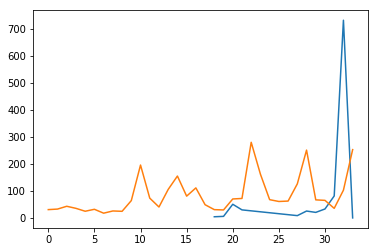

In [38]:
plt.figure()
for_plot = train_full[train_full['item_category_id'] == 8 ].groupby('unique')['item_cnt_month'].mean().reset_index()
plt.plot(for_plot['unique'], for_plot['item_cnt_month'])
for_plot2 = train_full[train_full['item_category_id'] == 9 ].groupby('unique')['item_cnt_month'].mean().reset_index()
plt.plot(for_plot2['unique'], for_plot2['item_cnt_month'])
plt.show()

In [39]:
#train_full[train_full['item_category_id']==1].groupby(['unique'])['item_cnt_month'].sum().reset_index()
train_full[train_full['item_category_id']==8]

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat
975699,3,9242,18,900.000000,1.0,8,False,NaN,NaN,NaN
977943,6,9243,18,2000.000000,1.0,8,False,NaN,NaN,NaN
980223,12,9241,18,600.000000,4.0,8,False,NaN,NaN,NaN
980224,12,9242,18,900.000000,8.0,8,False,NaN,NaN,NaN
980225,12,9243,18,2000.000000,1.0,8,False,NaN,NaN,NaN
981936,15,9241,18,600.000000,2.0,8,False,NaN,NaN,NaN
982748,16,9241,18,600.000000,5.0,8,False,NaN,NaN,NaN
983525,17,9242,18,900.000000,2.0,8,False,NaN,NaN,NaN
985111,19,9242,18,900.000000,1.0,8,False,NaN,NaN,NaN
985953,21,9242,18,900.000000,1.0,8,False,NaN,NaN,NaN


In [40]:
len(train_full4)

1609122

<Figure size 432x288 with 0 Axes>

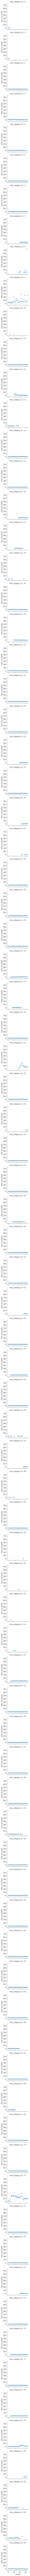

In [41]:
plt.figure()
for_plot = train_full.groupby(['item_category_id','unique'])['item_cnt_month'].mean().reset_index()
g = sns.FacetGrid(for_plot,row="item_category_id")
g = g.map(plt.scatter, "unique", "item_cnt_month", edgecolor="w")
plt.show()

In [42]:
test_full.head()

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,item_price,lag_only_item_cat,unique
0,0,5,5037,19.0,1,False,NaN,25.0,1693.518519,2443.0,34
1,1,5,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,34
2,2,5,5233,19.0,2,False,1.0,42.0,859.000000,2443.0,34
3,3,5,5232,23.0,1,False,NaN,28.0,599.000000,2203.0,34
4,4,5,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,34


In [43]:
train_full4.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN,NaN,NaN,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
train_full4.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_cnt_month',
       'item_category_id', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item'],
      dtype='object')

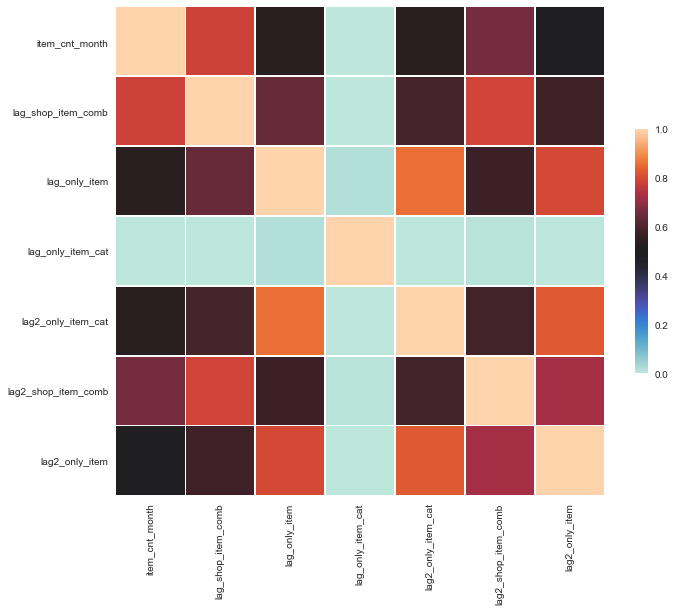

In [45]:
#Correlation matrix between y and lag2
sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = train_full4.drop(['shop_id','item_id','unique','item_price','item_category_id','is_music'], axis = 1).dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,vmin= 0, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

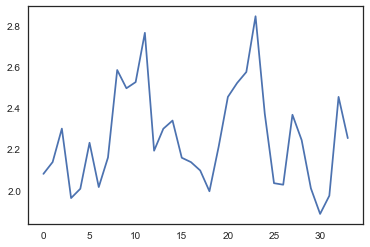

In [46]:
#Monthly trend doesnt show much though ,but some seasonality
for_plot = train_full4.groupby(['unique'])['item_cnt_month'].mean()
for_plot = for_plot.reset_index()
plt.figure(1)
plt.plot(for_plot['unique'],for_plot['item_cnt_month'])

In [47]:
??seasonal_decompose

Object `seasonal_decompose` not found.


/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


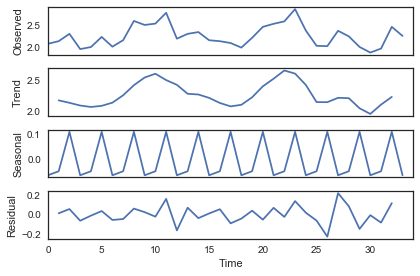

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_mean
series = for_plot['item_cnt_month']
result = seasonal_decompose(series.values, model='additive', freq = 3)
result.plot()
plt.show()
#Concatenating seasonal component with frequency 3.
make_dict = {}
for i in range(0,34):
    make_dict[i] = result.seasonal[i]
train_full4['seasonal_freq_3_feature'] = train_full4['unique'].map(make_dict)

## Prediction zone continued

In [49]:
#Training for an estimate with new features, lag1,lag2, season3.
train_lag1_lag2_season,val_lag1_lag2_season = month_split(train_full4,33)

In [50]:
dropped_train_lag1_lag2_season = train_lag1_lag2_season.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)

In [51]:
dropped_val_lag1_lag2_season = val_lag1_lag2_season.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)

In [52]:
#Training with xgboost with default parameters
xg_train = xgboost.DMatrix(dropped_train_lag1_lag2_season,label = train_lag1_lag2_season.copy()['item_cnt_month'])
xg_val = xgboost.DMatrix(dropped_val_lag1_lag2_season,label = val_lag1_lag2_season.copy()['item_cnt_month'])

In [53]:
param_set_1_lag_2_seasonal = {'max_depth': 6, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 1,'eval_metric': 'rmse'}

In [54]:
xgb_model1_set_1_lag_2_seasonal = xgboost.train(param_set_1_lag_2_seasonal , xg_train,early_stopping_rounds=10,evals = [(xg_train , "train_set"),(xg_val,"validation_set")] ,num_boost_round=1000)

[0]	train_set-rmse:8.62183	validation_set-rmse:14.6085
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 10 rounds.
[1]	train_set-rmse:8.57149	validation_set-rmse:14.579
[2]	train_set-rmse:8.52182	validation_set-rmse:14.5502
[3]	train_set-rmse:8.47282	validation_set-rmse:14.5217
[4]	train_set-rmse:8.42448	validation_set-rmse:14.4937
[5]	train_set-rmse:8.37679	validation_set-rmse:14.4662
[6]	train_set-rmse:8.32971	validation_set-rmse:14.4391
[7]	train_set-rmse:8.28329	validation_set-rmse:14.4124


KeyboardInterrupt: 

In [60]:
import pickle

In [61]:
pickle.dump(xgb_model1_set_1_lag_2_seasonal,open("xgb_model1_set_1_lag_2_seasonal.pickle.dat", "wb"))

NameError: name 'xgb_model1_set_1_lag_2_seasonal' is not defined

In [62]:
xgb_model1_set_1_lag_2_seasonal = pickle.load(open("xgb_model1_set_1_lag_2_seasonal.pickle.dat", "rb"))

In [3]:
pred_xgb_val_1_lag_2_seasonal = xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(dropped_val_lag1_lag2_season), ntree_limit=xgb_model1_set_1_lag_2_seasonal.best_ntree_limit)

NameError: name 'xgb_model1_set_1_lag_2_seasonal' is not defined

In [ ]:
rmse(pred_xgb_val_1_lag_2_seasonal, val_lag1_lag2_season['item_cnt_month'])

In [ ]:
monitoring_data

In [ ]:
compute_trimmed_rmse(pred_val.copy(), val_lag1_lag2_season['item_cnt_month'].copy())

In [ ]:
train_full.head()

In [ ]:
#Saving train data.
train_full4.to_csv('train_full_lag1_lag2_season.csv')

In [ ]:
#Not tuning xgb_1_season_lag_2 but ensembling with linear model.
for_lr = train_lag1_lag2_season.dropna()
X = for_lr.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)
y = for_lr['item_cnt_month']
lm_model_set_1_lag_2_seasonal = LinearRegression()
lm_model_set_1_lag_2_seasonal.fit(X,y)

In [ ]:
pred_lm_val_1_lag_2_seasonal = lm_model_set_1_lag_2_seasonal.predict(dropped_val_lag1_lag2_season.dropna())

In [ ]:
rmse(pred_lm_val_1_lag_2_seasonal, val_lag1_lag2_season.dropna()['item_cnt_month'])

In [ ]:
compute_trimmed_rmse(pred_lm_val_1_lag_2_seasonal.copy(), val_lag1_lag2_season.dropna()['item_cnt_month'].copy())

In [ ]:
#Ensemble validation error /2
print(rmse((pred_lm_val_1_lag_2_seasonal+xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(dropped_val_lag1_lag2_season.dropna())))/2, val_lag1_lag2_season.dropna()['item_cnt_month']))
print(compute_trimmed_rmse((pred_lm_val_1_lag_2_seasonal+xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(dropped_val_lag1_lag2_season.dropna())))/2, val_lag1_lag2_season.dropna()['item_cnt_month'].copy()))

### Making test set ready

In [ ]:
#OK, its a bomb. Making same features for test
for_test_lag2_item_cat = train_full[train_full['unique'] == 32].groupby('item_category_id')['item_cnt_month'].mean()

In [ ]:
for_test_lag2_item_shop = train_full[train_full['unique'] == 32].groupby(['item_id','shop_id'])['item_cnt_month'].mean()

In [ ]:
for_test_lag2_item_only = train_full[train_full['unique'] == 32].groupby(['item_id'])['item_cnt_month'].mean()

In [ ]:
for_test_lag2_item_cat = for_test_lag2_item_cat.reset_index()

In [ ]:
for_test_lag2_item_shop = for_test_lag2_item_shop.reset_index()

In [ ]:
for_test_lag2_item_only = for_test_lag2_item_only.reset_index()

In [ ]:
test_full2 = test_full.merge(for_test_lag2_item_cat, how = 'left', on = ['item_category_id'])

In [ ]:
test_full2.rename(columns = {'item_cnt_month':'lag2_only_item_cat'}, inplace=True)

In [ ]:
test_full3 = test_full2.merge(for_test_lag2_item_only , how = 'left', on = ['item_id'])

In [ ]:
test_full3.rename(columns = {'item_cnt_month':'lag2_only_item'}, inplace=True)

In [ ]:
test_full4 = test_full3.merge(for_test_lag2_item_shop, how = 'left', on = ['item_id','shop_id'])
#Hey you can make, item_cat, shop_id also. Try that

In [ ]:
test_full4.rename(columns = {'item_cnt_month':'lag2_shop_item_comb'}, inplace=True)

In [ ]:
test_full4['seasonal_freq_3_feature'] = -0.04751237 #What a waste. Is it so??

In [ ]:
#Saving test set for future prediction
test_full4.to_csv('test_full_lag1_lag2_seasonal.csv')

In [56]:
test_full4 = pd.read_csv('test_full_lag1_lag2_seasonal.csv')

In [57]:
test_set_for_prediction = test_full4.drop(['ID','shop_id','item_category_id','indicator','item_id'], axis = 1)

In [58]:
test_set_for_prediction['is_music'] = test_set_for_prediction['is_music'].astype(float)

In [64]:
features = xgb_model1_set_1_lag_2_seasonal.feature_names
test_set_for_prediction = test_set_for_prediction[features]

### Predicting on test

In [65]:
predo = xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(test_set_for_prediction))

In [66]:
submit = pd.DataFrame([test_full['ID'], predo]).T

In [67]:
submit['ID'] = submit['ID'].astype(int)
submit.rename(columns={'Unnamed 0': 'item_cnt_month'}, inplace=True)

In [68]:
submit.loc[submit['item_cnt_month'] >= 20, 'item_cnt_month'] = 20
submit.loc[submit['item_cnt_month'] <= 0, 'item_cnt_month'] = 0

In [ ]:
submit.to_csv('sep_4.csv',index=False)

In [69]:
test_set_for_prediction_no_na = test_set_for_prediction.dropna()

In [70]:
test_set_for_prediction_only_na = test_set_for_prediction[test_set_for_prediction.isnull().any(axis = 1)]

In [71]:
#First finding best alpha for ensembling on val set. alpha*lin + (1-alpha)*xgb
alphas = np.arange(0,1,0.001)
best_alpha = 0
best_error = compute_trimmed_rmse(pred_xgb_val_1_lag_2_seasonal.copy(),val_lag1_lag2_season['item_cnt_month'].copy())
for alpha in alphas:
    temp_pred = alpha*pred_lm_val_1_lag_2_seasonal + (1-alpha)*xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(dropped_val_lag1_lag2_season.dropna()))
    temp_error = compute_trimmed_rmse(val_lag1_lag2_season.dropna()['item_cnt_month'].copy(), temp_pred.copy())
    if (temp_error < best_error):
        best_alpha= alpha
        best_error = temp_error

NameError: name 'pred_xgb_val_1_lag_2_seasonal' is not defined

In [73]:
train_temp = pd.read_csv('train_full_lag1_lag2_season.csv')

In [83]:
train_temp.drop('Unnamed: 0', axis = 1, inplace = True)

In [84]:
#Not tuning xgb_1_season_lag_2 but ensembling with linear model.
for_lr = train_lag1_lag2_season.dropna()
X = for_lr.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)
y = for_lr['item_cnt_month']
lm_model_set_1_lag_2_seasonal = LinearRegression()
lm_model_set_1_lag_2_seasonal.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
X.columns

Index(['item_price', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature'],
      dtype='object')

In [86]:
len(test_set_for_prediction_no_na.columns)

9

In [87]:
#Predicting for no NA features(ensembles)
features = dropped_train_lag1_lag2_season.columns.values
test_set_for_prediction_no_na = test_set_for_prediction_no_na[features]
test_set_for_prediction_only_na = test_set_for_prediction_only_na[features]
xgb_predict_test = xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(test_set_for_prediction_no_na))
lm_predict_test = lm_model_set_1_lag_2_seasonal.predict(test_set_for_prediction_no_na)
pred_test_xgb_lin_0092_lag2_season = 0.092*lm_predict_test + (1-0.092)*xgb_predict_test

In [88]:
sum(test_full.index.values != test_full['ID'])

0

In [89]:
#Predicting for only NA features xgb.
pred_test_xgb_lin_0092_lag2_season_2 = xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(test_set_for_prediction_only_na))

In [90]:
index_no_na = pd.concat([pd.DataFrame(test_set_for_prediction_no_na.index.values),pd.DataFrame(pred_test_xgb_lin_0092_lag2_season)], axis = 1)

In [91]:
index_no_na.columns = ['index','item_cnt_month']

In [92]:
index_only_na = pd.concat([pd.DataFrame(test_set_for_prediction_only_na.index.values),pd.DataFrame(pred_test_xgb_lin_0092_lag2_season_2)], axis = 1)

In [93]:
index_only_na.columns = ['index','item_cnt_month']

In [96]:
np.sum(pd.isnull(test_set_for_prediction),axis = 0)

item_price                 102796
is_music                    15246
lag_shop_item_comb         185520
lag_only_item               46578
lag_only_item_cat           15246
lag2_only_item_cat          15246
lag2_shop_item_comb        187713
lag2_only_item              61614
seasonal_freq_3_feature         0
dtype: int64

## index_no_na.shape

In [95]:
index_only_na.shape

(202791, 2)

In [274]:
index_only_na['item_cnt_month'] = 0

In [55]:
index_only_na.head(10)

NameError: name 'index_only_na' is not defined

In [276]:
index_only_na.columns = ['index','item_cnt_month']

In [277]:
final_pred = pd.concat([index_no_na,index_only_na], axis = 0)

In [278]:
index_only_na.head(10)

,index,item_cnt_month
0,0,0
1,1,0
2,3,0
3,4,0
4,7,0
5,8,0
6,9,0
7,11,0
8,12,0
9,13,0


In [279]:
final_pred[final_pred['index'] == 202791]

,index,item_cnt_month
191628,202791,0.0


In [280]:
final_pred_sorted = final_pred.sort_values("index").copy()

In [281]:
final_pred_sorted.index = final_pred_sorted['index']

In [282]:
count = 0
for i in test_full['ID']:
    if i not in final_pred_sorted.index.values:
        print(final_pred[final_pred['index'] == i])

In [283]:
sum(test_full['ID'].values != final_pred_sorted.index.values)

0

In [284]:
final_pred_sorted.drop('index',axis = 1, inplace = True)

In [285]:
for_submit = pd.concat([test_full['ID'],final_pred_sorted], axis = 1)

In [286]:
sum(for_submit['ID'].values != for_submit.index.values)

0

In [287]:
for_submit.shape

(214200, 2)

In [288]:
for_submit.loc[for_submit['item_cnt_month']> 20, 'item_cnt_month'] = 20
for_submit.loc[for_submit['item_cnt_month']< 0, 'item_cnt_month'] = 0

In [ ]:
for_submit.to_csv('sep5.csv',index = False)

In [ ]:
min(for_submit['item_cnt_month'])

In [ ]:
max(for_submit['item_cnt_month'])

In [ ]:
for_submit_0025 = for_submit.copy()

In [ ]:
for_submit_0025['item_cnt_month'] = for_submit['item_cnt_month'] - 0.025

In [ ]:
for_submit_0025.loc[for_submit_0025['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
min(for_submit_0025['item_cnt_month'])

In [ ]:
max(for_submit_0025['item_cnt_month'])

In [ ]:
for_submit_0025.to_csv('sep5_less_0025.csv',index = False)

In [ ]:
for_submit_0025.shape

In [ ]:
for_submit_005 = for_submit.copy()

In [ ]:
for_submit_005['item_cnt_month'] = for_submit_0025['item_cnt_month'] - 0.025

In [ ]:
for_submit_005.loc[for_submit_005['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
for_submit_005.to_csv('sep5_less_005.csv', index=False)

In [ ]:
for_submit_0075 = for_submit.copy()
for_submit_0075['item_cnt_month'] = for_submit_005['item_cnt_month'] - 0.025
for_submit_0075.loc[for_submit_0075['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
for_submit_0075.to_csv('sep5_less_0075.csv', index=False)

In [ ]:
for_submit = pd.read_csv('sep5.csv')
for_submit_0075 = pd.read_csv('sep5_less_0075.csv')

In [ ]:
for_submit_01 = for_submit.copy()
for_submit_01['item_cnt_month'] = for_submit_0075['item_cnt_month'] - 0.025
for_submit_01.loc[for_submit_01['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
for_submit_01.to_csv('sep5_less_01.csv', index=False)

In [ ]:
for_submit_02 = for_submit.copy()
for_submit_02['item_cnt_month'] = for_submit_01['item_cnt_month'] - 0.1
for_submit_02.loc[for_submit_02['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
for_submit_02.to_csv('sep5_less_02.csv', index=False)

In [290]:
for_submit = pd.read_csv('sep5.csv')

In [291]:
for_submit_0025 = pd.read_csv('sep5_less_0025.csv')

In [292]:
for_submit_005 = pd.read_csv('sep5_less_005.csv')

In [293]:
for_submit_0075 = pd.read_csv('sep5_less_0075.csv')

In [294]:
for_submit_01 = pd.read_csv('sep5_less_01.csv')

In [295]:
#Submissions made with lag2 and season.
for_submit.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.571729
3,3,0.000000
4,4,0.000000


In [296]:
for_submit_0025.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.546729
3,3,0.000000
4,4,0.000000


In [297]:
for_submit_005.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.521729
3,3,0.000000
4,4,0.000000


In [298]:
for_submit_0075.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.496729
3,3,0.000000
4,4,0.000000


In [299]:
for_submit_01.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.471729
3,3,0.000000
4,4,0.000000
